In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model



In [4]:
df=pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
new=df.rename(columns={'yrs.service':'Exp'})
new

,rank,discipline,yrs.since.phd,Exp,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


Text(0, 0.5, 'Salary')

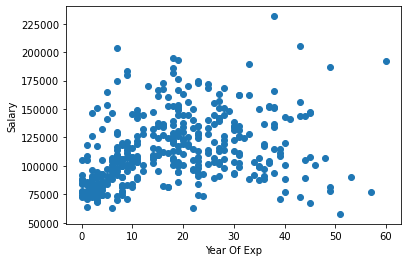

In [8]:
plt.scatter(x=new.Exp,y=new.salary)
plt.xlabel('Year Of Exp')
plt.ylabel('Salary')

In [9]:
x=new['salary']
y=new['Exp']
x

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

In [11]:
x_train = np.array(x_train).reshape((len(x_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

x_test = np.array(x_test).reshape(len(x_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [12]:
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

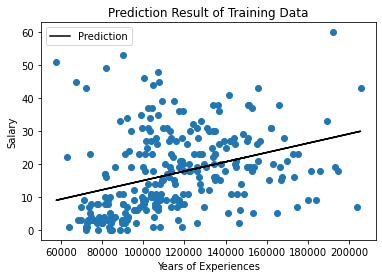

In [14]:
y_train_pred = lm.predict(x_train)

plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, color='black', label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

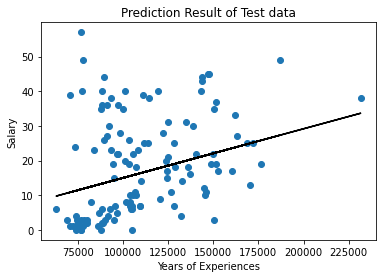

In [17]:
y_test_pred = lm.predict(x_test)

plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, color='black')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.show()